In [1]:
!pip install scikit-learn


In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

In [3]:
df = pd.read_csv('/content/Creditcard_data.csv')


In [4]:
print(df.head())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(df.shape)
df.head()

(772, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [11]:
def evaluate_models(X_train, X_test, y_train, y_test):

    models = {
        "M1_Logistic": LogisticRegression(max_iter=1000),
        "M2_DecisionTree": DecisionTreeClassifier(),
        "M3_RandomForest": RandomForestClassifier(),
        "M4_GradientBoost": GradientBoostingClassifier(),
        "M5_SVM": SVC()
    }

    scores = {}

    for name, model in models.items():

        # Safety check
        if len(np.unique(y_train)) < 2:
            scores[name] = "Only one class"
            continue

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        scores[name] = round(accuracy_score(y_test, preds)*100,2)

    return scores



Simple Random Sampling

In [13]:
#Simple Random Sampling
sample1 = df.sample(frac=0.6, random_state=42)

X1 = sample1.drop("Class", axis=1)
y1 = sample1["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=42,
    stratify=y1
)

result1 = evaluate_models(X_train, X_test, y_train, y_test)



Cross Validation Sampling

In [25]:
#Cross validation
models = {
    "M1_Logistic": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(),
    "M3_RandomForest": RandomForestClassifier(),
    "M4_GradientBoost": GradientBoostingClassifier(),
    "M5_SVM": SVC(kernel='linear')
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = {name: [] for name in models}

for train_idx, test_idx in skf.split(X, y):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():

        clf = clone(model)
        clf.fit(X_train, y_train)

        preds = clf.predict(X_test)
        acc = accuracy_score(y_test, preds)

        scores[name].append(acc)

result2 = {
    model: round(np.mean(acc_list)*100, 2)
    for model, acc_list in scores.items()
}





Stratified Sampling

In [15]:
#Stratified Sampling
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for train_idx, _ in strat.split(X, y):
    strat_sample = df.iloc[train_idx]

X3 = strat_sample.drop("Class", axis=1)
y3 = strat_sample["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X3, y3,
    test_size=0.2,
    random_state=42,
    stratify=y3
)

result3 = evaluate_models(X_train, X_test, y_train, y_test)


Cluster Sampling

In [16]:
#Cluster Sampling
df_cluster = df.copy()

df_cluster['Cluster'] = pd.qcut(df_cluster['Amount'], q=5, labels=False)

chosen_cluster = df_cluster[df_cluster['Cluster'] == 2]

# fallback if cluster is too imbalanced
if chosen_cluster['Class'].nunique() < 2:
    chosen_cluster = df_cluster.sample(frac=0.6, random_state=42)

X4 = chosen_cluster.drop(["Class","Cluster"], axis=1, errors='ignore')
y4 = chosen_cluster["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X4, y4,
    test_size=0.2,
    random_state=42,
    stratify=y4
)

result4 = evaluate_models(X_train, X_test, y_train, y_test)


Bootstrap Sampling

In [17]:
#Bootstrap Sampling
bootstrap_sample = resample(
    df,
    replace=True,
    n_samples=int(0.6*len(df)),
    random_state=42
)

X5 = bootstrap_sample.drop("Class", axis=1)
y5 = bootstrap_sample["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X5, y5,
    test_size=0.2,
    random_state=42,
    stratify=y5
)

result5 = evaluate_models(X_train, X_test, y_train, y_test)


In [26]:
final_table = pd.DataFrame({
    "SimpleRandom": result1,
    "CrossValidation": result2,
    "Stratified": result3,
    "Cluster": result4,
    "Bootstrap": result5
})

final_table


,SimpleRandom,CrossValidation,Stratified,Cluster,Bootstrap
M1_Logistic,98.92,98.70,97.85,98.92,97.85
M2_DecisionTree,95.70,98.19,96.77,96.77,100.00
M3_RandomForest,98.92,98.83,98.92,98.92,100.00
M4_GradientBoost,98.92,98.57,98.92,98.92,100.00
M5_SVM,98.92,98.70,98.92,98.92,97.85


In [30]:
print("\nBest Sampling for Each Model:\n")
print(final_table.idxmax(axis=1))

print("\n Overall Best Combination:")
print(final_table.stack().idxmax())




Best Sampling for Each Model:

M1_Logistic         SimpleRandom
M2_DecisionTree        Bootstrap
M3_RandomForest        Bootstrap
M4_GradientBoost       Bootstrap
M5_SVM              SimpleRandom
dtype: object

 Overall Best Combination:
('M2_DecisionTree', 'Bootstrap')


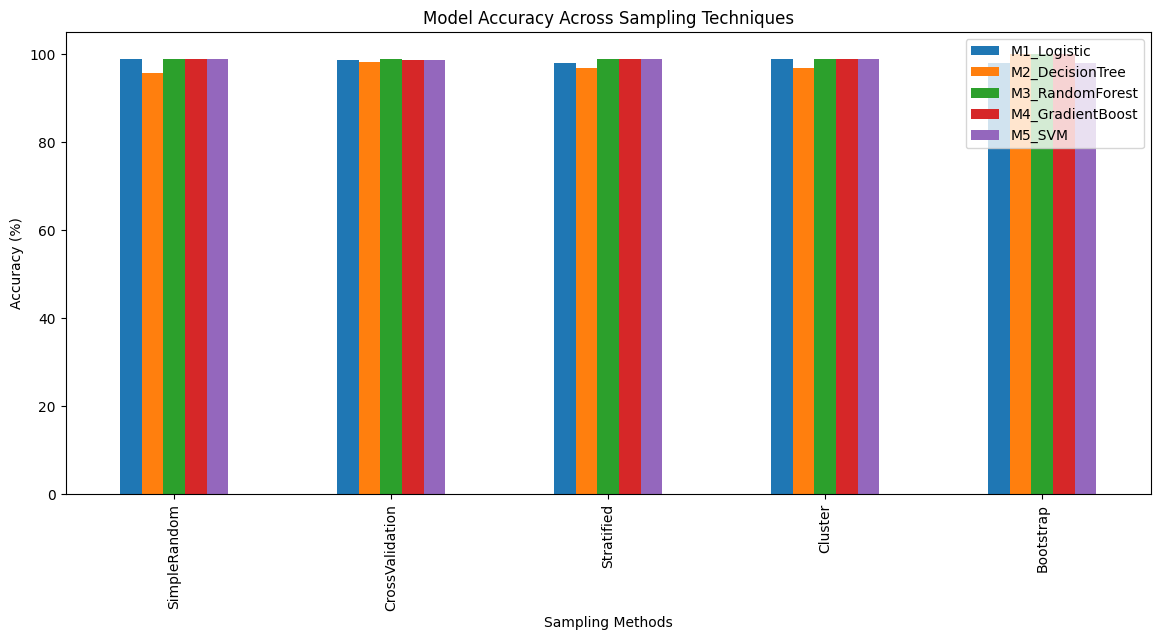

In [29]:
import matplotlib.pyplot as plt

final_table = final_table.replace("Only one class", np.nan).astype(float)

final_table.T.plot(kind='bar', figsize=(14,6))

plt.title("Model Accuracy Across Sampling Techniques")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sampling Methods")

plt.show()

